In [4]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [8]:
TRAIN_DIR = 'Data/images/train'
TEST_DIR = 'Data/images/test'

In [9]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [10]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

neutral completed
sad completed
angry completed
happy completed


In [11]:
print(train)

                                     image    label
0       Data/images/train/neutral/7470.jpg  neutral
1      Data/images/train/neutral/29714.jpg  neutral
2      Data/images/train/neutral/13369.jpg  neutral
3      Data/images/train/neutral/18013.jpg  neutral
4       Data/images/train/neutral/3266.jpg  neutral
...                                    ...      ...
21072    Data/images/train/happy/32904.jpg    happy
21073    Data/images/train/happy/33723.jpg    happy
21074    Data/images/train/happy/10277.jpg    happy
21075    Data/images/train/happy/29776.jpg    happy
21076    Data/images/train/happy/14963.jpg    happy

[21077 rows x 2 columns]


In [12]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

neutral completed
sad completed
angry completed
happy completed


In [13]:
print(test)

                                   image    label
0      Data/images/test/neutral/7009.jpg  neutral
1     Data/images/test/neutral/12423.jpg  neutral
2     Data/images/test/neutral/19131.jpg  neutral
3      Data/images/test/neutral/5591.jpg  neutral
4     Data/images/test/neutral/23396.jpg  neutral
...                                  ...      ...
5135    Data/images/test/happy/15271.jpg    happy
5136    Data/images/test/happy/21027.jpg    happy
5137    Data/images/test/happy/18297.jpg    happy
5138    Data/images/test/happy/24393.jpg    happy
5139    Data/images/test/happy/22459.jpg    happy

[5140 rows x 2 columns]


In [14]:
from tqdm.notebook import tqdm

In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [16]:
train_features = extract_features(train['image'])

  0%|          | 0/21077 [00:00<?, ?it/s]

/home/goru/.conda/envs/tf/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [17]:
test_features = extract_features(test['image'])

  0%|          | 0/5140 [00:00<?, ?it/s]

In [18]:
x_train = train_features/255.0
x_test = test_features/255.0

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [21]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [22]:
y_train = to_categorical(y_train,num_classes = 4)
y_test = to_categorical(y_test,num_classes = 4)

In [23]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(4, activation='softmax'))

2023-09-18 23:59:22.212464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-18 23:59:22.338427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-18 23:59:22.338644: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-18 23:59:22.339255: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [26]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [27]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 150, validation_data = (x_test,y_test)) 

Epoch 1/150


2023-09-18 23:59:51.424901: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 194245632 exceeds 10% of free system memory.
2023-09-18 23:59:51.560576: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 194245632 exceeds 10% of free system memory.
2023-09-18 23:59:52.347883: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


165/165 [==============================] - 16s 91ms/step - loss: 1.3486 - accuracy: 0.3498 - val_loss: 1.3200 - val_accuracy: 0.3739
Epoch 2/150
165/165 [==============================] - 13s 81ms/step - loss: 1.2955 - accuracy: 0.3977 - val_loss: 1.1892 - val_accuracy: 0.4879
Epoch 3/150
165/165 [==============================] - 14s 83ms/step - loss: 1.1843 - accuracy: 0.4723 - val_loss: 1.0753 - val_accuracy: 0.5346
Epoch 4/150
165/165 [==============================] - 14s 84ms/step - loss: 1.1125 - accuracy: 0.5107 - val_loss: 1.0233 - val_accuracy: 0.5556
Epoch 5/150
165/165 [==============================] - 14s 84ms/step - loss: 1.0575 - accuracy: 0.5398 - val_loss: 0.9520 - val_accuracy: 0.5901
Epoch 6/150
165/165 [==============================] - 14s 84ms/step - loss: 1.0186 - accuracy: 0.5617 - val_loss: 0.9356 - val_accuracy: 0.5969
Epoch 7/150
165/165 [==============================] - 14s 87ms/step - loss: 0.9934 - accuracy: 0.5739 - val_loss: 0.8975 - val_accuracy: 0.62

165/165 [==============================] - 14s 86ms/step - loss: 0.6233 - accuracy: 0.7548 - val_loss: 0.7605 - val_accuracy: 0.6971
Epoch 58/150
165/165 [==============================] - 14s 85ms/step - loss: 0.6287 - accuracy: 0.7524 - val_loss: 0.7596 - val_accuracy: 0.7014
Epoch 59/150
165/165 [==============================] - 14s 86ms/step - loss: 0.6230 - accuracy: 0.7494 - val_loss: 0.7621 - val_accuracy: 0.6934
Epoch 60/150
165/165 [==============================] - 14s 85ms/step - loss: 0.6129 - accuracy: 0.7577 - val_loss: 0.7625 - val_accuracy: 0.6996
Epoch 61/150
165/165 [==============================] - 14s 86ms/step - loss: 0.6019 - accuracy: 0.7628 - val_loss: 0.7617 - val_accuracy: 0.6996
Epoch 62/150
165/165 [==============================] - 14s 84ms/step - loss: 0.6097 - accuracy: 0.7583 - val_loss: 0.7675 - val_accuracy: 0.6992
Epoch 63/150
165/165 [==============================] - 14s 85ms/step - loss: 0.6081 - accuracy: 0.7591 - val_loss: 0.7644 - val_accuracy

165/165 [==============================] - 14s 83ms/step - loss: 0.4498 - accuracy: 0.8326 - val_loss: 0.7855 - val_accuracy: 0.7029
Epoch 114/150
165/165 [==============================] - 14s 84ms/step - loss: 0.4402 - accuracy: 0.8324 - val_loss: 0.8350 - val_accuracy: 0.6946
Epoch 115/150
165/165 [==============================] - 14s 86ms/step - loss: 0.4476 - accuracy: 0.8300 - val_loss: 0.8068 - val_accuracy: 0.6955
Epoch 116/150
165/165 [==============================] - 14s 87ms/step - loss: 0.4419 - accuracy: 0.8328 - val_loss: 0.8285 - val_accuracy: 0.6946
Epoch 117/150
165/165 [==============================] - 14s 86ms/step - loss: 0.4438 - accuracy: 0.8333 - val_loss: 0.8300 - val_accuracy: 0.6944
Epoch 118/150
165/165 [==============================] - 14s 88ms/step - loss: 0.4379 - accuracy: 0.8366 - val_loss: 0.8186 - val_accuracy: 0.6961
Epoch 119/150
165/165 [==============================] - 14s 87ms/step - loss: 0.4363 - accuracy: 0.8353 - val_loss: 0.7943 - val_ac

In [28]:
model_json = model.to_json()
with open("emotiondetector1.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector1.h5")

In [29]:
from keras.models import model_from_json

In [30]:
json_file = open("emotiondetector1.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector1.h5")

In [31]:
label = ['angry','happy','neutral','sad']

In [32]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 [==============================] - 0s 280ms/step
model prediction is  angry


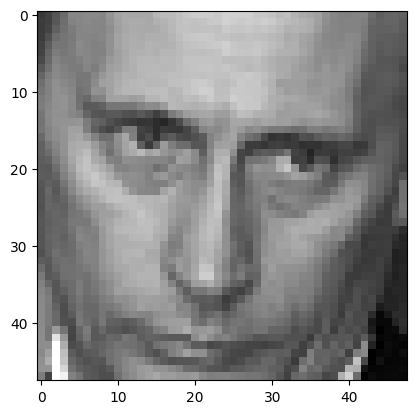

In [35]:
image = 'Data/images/train/angry/56.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 [==============================] - 0s 17ms/step
model prediction is  sad


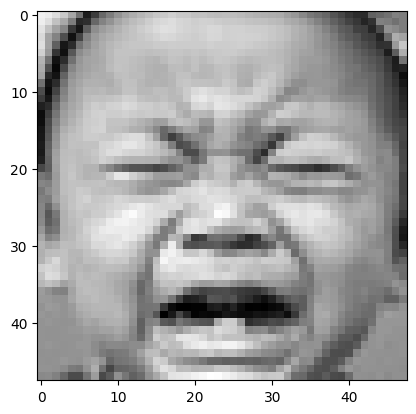

In [36]:
image = 'Data/images/train/sad/130.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 15ms/step
model prediction is  happy


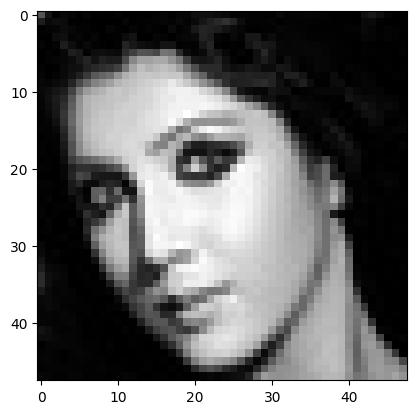

In [38]:
image = 'Data/images/train/happy/114.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')